# Tutorial: Scorecard with continuous target

In this tutorial, we show that the use of scorecards is not limited to binary classification problems. We develop a scorecard using the Huber regressor as an estimator. The dataset for this tutorial is https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import HuberRegressor

from optbinning import BinningProcess
from optbinning import Scorecard

Load the dataset.

In [2]:
data = fetch_california_housing()

target = "target"
variable_names = data.feature_names
X = pd.DataFrame(data.data, columns=variable_names)
y = data.target

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Then, we instantiate a ``BinningProcess`` object class with variable names.

In [4]:
binning_process = BinningProcess(variable_names)

We select a robust linear model as an estimator.

In [5]:
estimator = HuberRegressor(max_iter=200)

Finally, we instantiate a ``Scorecard`` class with the target name, a binning process object, and an estimator. In addition, we want to apply a scaling method to the scorecard points. Also, we select the reverse scorecard mode, so the score increases as the average house value increases.

In [6]:
scorecard = Scorecard(binning_process=binning_process,
                      estimator=estimator, scaling_method="min_max",
                      scaling_method_params={"min": 0, "max": 100},
                      reverse_scorecard=True)

In [7]:
scorecard.fit(X, y)

Scorecard(binning_process=BinningProcess(variable_names=['MedInc', 'HouseAge',
                                                         'AveRooms',
                                                         'AveBedrms',
                                                         'Population',
                                                         'AveOccup', 'Latitude',
                                                         'Longitude']),
          estimator=HuberRegressor(max_iter=200), reverse_scorecard=True,
          scaling_method='min_max',
          scaling_method_params={'max': 100, 'min': 0})

Similar to other objects in OptBinning, we can print overview information about the options settings, problems statistics, and the number of selected variables after the binning process.

In [8]:
scorecard.information(print_level=2)

optbinning (Version 0.13.1)
Copyright (c) 2019-2022 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    binning_process                      yes   * U
    estimator                            yes   * U
    scaling_method                   min_max   * U
    scaling_method_params                yes   * U
    intercept_based                    False   * d
    reverse_scorecard                   True   * U
    rounding                           False   * d
    verbose                            False   * d
  End options

  Statistics
    Number of records                  20640
    Number of variables                    8
    Target type                   continuous

    Number of numerical                    8
    Number of categorical                  0
    Number of selected                     8

  Timing
    Total time                          2.76 sec
    Binning process                     1.73 sec   ( 62.51%)
    Estimator                           0.90 sec   ( 32.75%

 Two scorecard styles are available: ``style="summary"`` shows the variable name, and their corresponding bins and assigned points; ``style="detailed"`` adds information from the corresponding binning table.

In [9]:
scorecard.table(style="summary")

,Variable,Bin,Points
0,MedInc,"(-inf, 1.90)",9.869215
1,MedInc,"[1.90, 2.16)",10.896706
2,MedInc,"[2.16, 2.37)",11.482635
3,MedInc,"[2.37, 2.66)",12.607197
4,MedInc,"[2.66, 2.88)",13.608251
...,...,...,...
2,Longitude,"[-118.33, -118.26)",10.478833
3,Longitude,"[-118.26, -118.16)",9.099825
4,Longitude,"[-118.16, inf)",10.232190
5,Longitude,Special,1.378710


In [10]:
scorecard.table(style="detailed")

,Variable,Bin id,Bin,Count,Count (%),Sum,Std,Mean,Min,Max,Zeros count,WoE,IV,Coefficient,Points
0,MedInc,0,"(-inf, 1.90)",2039,0.098789,2240.75810,0.711884,1.098950,0.14999,5.00001,0,-0.969609,0.095786,0.990156,9.869215
1,MedInc,1,"[1.90, 2.16)",1109,0.053731,1366.22203,0.663722,1.231941,0.14999,5.00001,0,-0.836618,0.044952,0.990156,10.896706
2,MedInc,2,"[2.16, 2.37)",1049,0.050824,1371.86004,0.706034,1.307779,0.17500,5.00001,0,-0.760779,0.038666,0.990156,11.482635
3,MedInc,3,"[2.37, 2.66)",1551,0.075145,2254.12108,0.704002,1.453334,0.30000,5.00001,0,-0.615224,0.046231,0.990156,12.607197
4,MedInc,4,"[2.66, 2.88)",1075,0.052083,1701.62105,0.756965,1.582903,0.22500,5.00001,0,-0.485655,0.025295,0.990156,13.608251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,Longitude,2,"[-118.33, -118.26)",1120,0.054264,2304.45829,0.999908,2.057552,0.17500,5.00001,0,-0.011006,0.000597,0.566819,10.478833
3,Longitude,3,"[-118.26, -118.16)",1127,0.054603,1967.46721,0.826149,1.745756,0.59400,5.00001,0,-0.322802,0.017626,0.566819,9.099825
4,Longitude,4,"[-118.16, inf)",6530,0.316376,13071.65995,0.999713,2.001786,0.14999,5.00001,0,-0.066773,0.021125,0.566819,10.232190
5,Longitude,5,Special,0,0.000000,0.00000,NaN,0.000000,NaN,NaN,0,-2.068558,0.000000,0.566819,1.378710


Compute score and predicted target using the fitted estimator.

In [11]:
score = scorecard.score(X)

In [12]:
y_pred = scorecard.predict(X)

The following plot shows a perfect linear relationship between the score and average the house value.

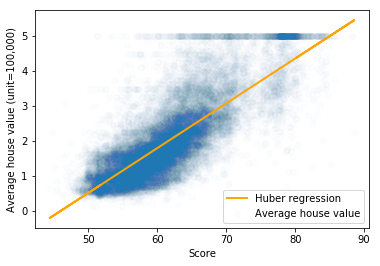

In [13]:
plt.scatter(score, y, alpha=0.01, label="Average house value")
plt.plot(score, y_pred, label="Huber regression", linewidth=2, color="orange")
plt.ylabel("Average house value (unit=100,000)")
plt.xlabel("Score")
plt.legend()
plt.show()